## For Matching buzzard halos with redMaPPer clusters. 
### Created Jan, 2018
### Zhuowen Zhang

**Update April 29, 2018:** 

Halo files are halos_unique in Buzzard Y3 to get rid of overlapping halos in boxes with overlapping regions. Mass definition is M200b. Cosmology used for comoving distance measurements reflect 
Buzzard cosmology. 

**Update April 25, 2019 (almost one year from now):** 

1. Use the Chinchilla-0_halos_unique_all.fits which combines all *_unique_X FITs files, so that no need to merge files for each run. Saves time. 


2. Change of halo matching algorithm. For some clusters halos and cluster centers have exact match, when both are centerd on the BCG. The algo now only applies mass-richness priority matcihng to none (RA,DEC,Z) matched cluster/halos. This should reduce the number of miscentering from ~50% of 20,000 redM halos to something more like the real data, refer Y.Zhang et al 2019. 


In [1]:
import numpy as np
import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')
from tools.setup.setup import home_dir
home_dir = home_dir()

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
plot_pretty()

# setup notebook for inline figures
%matplotlib inline

### Extracting Halo and Cluster Files
From buzzard and Chinchilla in Slac_Stanford simulation repository

**??Question??** Will the matching algo work well with a 5e13 halo mass cut. Probably not, clusters will choose the most massive halos anyway.

In [75]:
from tools.setup.setup import data_home_dir
import astropy.io.fits as fits
#Read http://pythonhosted.org/pyfits/

datadir = data_home_dir()

#RedMapper Galaxy cluster data
redM_data = datadir+'buzzard_halo/redM/'+'buzzard-0_1.6_y3_run_redmapper_v6.4.20_lgt20_vl02_catalog.fit'
redM_list = fits.open(redM_data)
redM_data = redM_list[1].data

print "Names of columns in redM_data are: \n"
print redM_data.names

print "Number of clusters is ", len(redM_data)

Names of columns in redM_data are: 

['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD']
Number of clusters is  24243


#### Old code for combining halos files from different runs. 

In [76]:
halos_dir = datadir + 'buzzard_halo/chinchilla/Chinchilla-0_halos_unique_all.fits'
halos_list = fits.open(halos_dir)
halos_data = halos_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in halos_data are: \n"
print halos_data.names

#Converting FITS files into record array
halos_data = np.array(halos_data, dtype=halos_data.dtype)
halos_data = halos_data.view(np.recarray)

print "\n Number of halos is", len(halos_data)

Names of columns in halos_data are: 

['ID', 'DESCID', 'MVIR', 'VMAX', 'VRMS', 'RVIR', 'RS', 'NP', 'PX', 'PY', 'PZ', 'VX', 'VY', 'VZ', 'JX', 'JY', 'JZ', 'SPIN', 'RS_KLYPIN', 'MVIR_ALL', 'M200B', 'M200C', 'M500C', 'M2500C', 'XOFF', 'VOFF', 'SPIN_BULLOCK', 'B_TO_A', 'C_TO_A', 'PID', 'LUMTOT', 'LUM20', 'LBCG', 'NGALS', 'N18', 'N19', 'N20', 'N21', 'N22', 'Z', 'RA', 'DEC']

 Number of halos is 12198813


#### Cuts and filters

In [77]:
#Cut off halos with mass less than 10^13 M_sun
mass_cutoff = halos_data['M200B'] > 1e13
halos_data = halos_data[mass_cutoff]
print "After mass cut of M > 5e13 M_sun number of halos is ", len(halos_data)

After mass cut of M > 5e13 M_sun number of halos is  4116574


#### Extract Parameters from Files
Note that RA, DEC are in radians, unusal way of expressing them.

In [78]:
#Parameters for matching
redM_ID = redM_data['MEM_MATCH_ID']
#Convert to radians to match halos
redM_RA = redM_data['RA']; redM_DEC = redM_data['DEC']
redM_z = redM_data['Z_LAMBDA']
redM_lmda = redM_data['LAMBDA_CHISQ']; 

halos_ID = halos_data['ID']; halos_RA = halos_data['RA'] 
halos_DEC = halos_data['DEC']; halos_z = halos_data['Z']

halos_M200b = halos_data['M200B']; halos_Mvir = halos_data['MVIR']

halos_Rvir = halos_data['RVIR'] #in kpc
halos_X = halos_data['PX']; halos_Y = halos_data['PY']; halos_Z = halos_data['PZ']

In [79]:
#Convert from z to comoving distance in fiducial cosmology
from astropy import units as u
from astropy import cosmology
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

redM_comvr = cosmo.comoving_distance(redM_data.Z)
halos_comvr = cosmo.comoving_distance(halos_data.Z)

#### Rotate the halo files

**Update April 26, 2019** 

Chunhao uses np.dot(rmat.T, halos_posvec), or the transpose of that if you make halos_posvec a Nx3 matrix.

It should however be np.dot(rmat, halos_posvec), no transpose.

In [80]:
#Rotate the halo files
import healpy as hp
import fitsio
from tools.setup.setup import tools_home_dir
import pickle

toolsdir = tools_home_dir()

#file containing the rotation matrix 
rotfile = toolsdir+'desy3_irot.pkl'

with open(rotfile, 'r') as fp:
    rmat = pickle.load(fp)
    
    
halos_norm = np.sqrt(halos_data['PX']**2. + halos_data['PY']**2. + halos_data['PZ']**2. )    
halos_posvec = np.array([halos_data['PX'], halos_data['PY'], halos_data['PZ']])/halos_norm
halos_rposvec = np.matmul(rmat, halos_posvec)

#Rotate the Cartesian positions.
halos_X = halos_rposvec[0]*halos_norm; halos_Y = halos_rposvec[1]*halos_norm; halos_Z = halos_rposvec[2]*halos_norm
#convert to angular coords (in Radians)
theta, phi = hp.vec2ang(halos_rposvec.T)
halos_data['DEC'] = np.pi/2 - theta
halos_data['RA'] = phi
halos_DEC = halos_data['DEC'] * 180/np.pi
halos_RA = halos_data['RA'] * 180/np.pi
#print 'Halos DEC and RA \n', halos_data['DEC'], '\n', halos_data['RA']

print rmat

[[-0.33976859  0.93565351  0.0954453 ]
 [ 0.94049749  0.33851385  0.02954402]
 [-0.00466659  0.09980419 -0.99499615]]


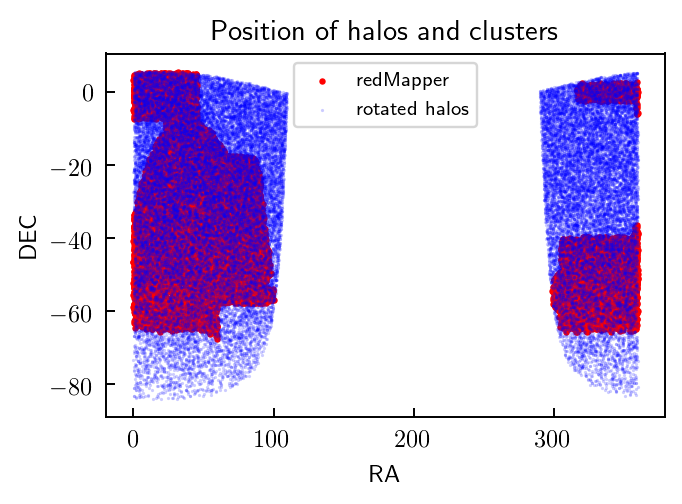

In [82]:
#Scatter plot to inspect that halos match clusters
plt.figure(figsize=(4,3))
plt.scatter(redM_RA, redM_DEC, c='r', s=7, marker='o',linewidth=0.0, label='redMapper')
plt.scatter(halos_RA[::100], halos_DEC[::100], c='b', marker='.', s=7, linewidth=0.0, alpha=0.2, label='rotated halos')
plt.xlabel('RA'); plt.ylabel('DEC ')
plt.legend(fontsize=8, loc='upper center')
plt.title('Position of halos and clusters')
plt.tight_layout()
#plt.savefig('halo_cluster_pos.png')
plt.show()

## Finding miscentered clusters 

For those with (RA,DEC) targeted on the same BCG automatically assumes as centered. The rest are miscentered and the halo-cluster matching applies to those. 

Note that halos are initially unrotated and redM rotated, so this should come after rotation algo. 

In [84]:
#Test if there are any matched in Z
inx = np.where(np.abs(redM_data.Z-halos_data.Z) < 1e-5)

[]


In [108]:
#Finding mismatch between RA, DEC, Z in halorun versus redM_galaxy
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

#Using find_nearest iterate through the array and find index of matched ones, also index of unmatched. 
#Go through the richness-mass template finder. 
redM_coord = SkyCoord(redM_data.RA*u.deg, redM_data.DEC*u.deg, distance = redM_comvr, frame='icrs')
halos_coord = SkyCoord(halos_RA*u.deg, halos_DEC*u.deg, distance = halos_comvr, frame='icrs')

#Finding nearest neighbor to the halorun catalog.
def find_nearest(ind):
    dist_sep = halos_coord.separation_3d(redM_coord[ind])
    idx = (np.abs(dist_sep)).argmin()
    return idx, dist_sep[idx].value

#Testing match of specific halo using index testn
testn = 9785
ind, dist = find_nearest(testn)
print ind, dist
print halos_RA[ind] -  redM_RA[testn]
print halos_DEC[ind] - redM_data.DEC[testn]
#print hrun_data.Z[testn] - redM_gal_data.Z[ind] #Some error in redshift
print "{:2g}".format(redM_data.Z[testn] - halos_data.Z[ind]) #Small error in redshift

print "Done"

 1396656 0.559392895571
0.015535849493010012
0.007916010345523361
-9.12765e-06
Done


In [ ]:
## Note Matching is poor because the redshift is off. Ask Joe, Chunhao, Eli about Z defn. 
## Previous cluster-halo matching used 2D separation assuming same redshift. 

In [109]:
#Match halos by RA only.
dist_lim = 2 #Mpc
nearby_ind = []
for i, cur_cl in enumerate(redM_data):
    cur_RA = cur_cl['RA']
    cur_DEC = cur_cl['DEC']
    ind, dist = find_nearest(i)
    RA_val = halos_RA[ind]
    DEC_val = halos_DEC[ind]
    if dist <= dist_lim: 
        nearby_ind.append(i)
    if i % 100 == 0: 
        print "Processing cluster number ", i
        print "Number of clusters with nearby halos are", len(nearby_ind)
print "Total number of clusters with nearbby are", len(nearby_ind)

Processing cluster number  0
Number of clusters with nearby halos are 0
Processing cluster number  100
Number of clusters with nearby halos are 15
Processing cluster number  200
Number of clusters with nearby halos are 31
Processing cluster number  300
Number of clusters with nearby halos are 43
Processing cluster number  400
Number of clusters with nearby halos are 56
Processing cluster number  500
Number of clusters with nearby halos are 65
Processing cluster number  600
Number of clusters with nearby halos are 79
Processing cluster number  700
Number of clusters with nearby halos are 89
Processing cluster number  800
Number of clusters with nearby halos are 104
Processing cluster number  900
Number of clusters with nearby halos are 111
Processing cluster number  1000
Number of clusters with nearby halos are 121
Processing cluster number  1100
Number of clusters with nearby halos are 131
Processing cluster number  1200
Number of clusters with nearby halos are 141
Processing cluster n

In [ ]:
#Extract the centered halos
#Two files. One is centered ID, other is miscentered ID. 

#Centered ID, create column in a file. 
cent_haloID = redM_halos[centered_ind].halos_ID

#Miscentered ID
##?? This might be problematic: Some of "miscentered" are not in halorun, so they might not really be miscentered. 
miscent_ind = [i for i, x in enumerate(range(len(redM_halos))) if x not in centered_ind]
miscent_haloID = redM_halos[miscent_ind].halos_ID

## Randomly select halos

In [ ]:
import os
print os.getcwd()
print os.path.exists('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster/output')

In [ ]:
import numpy.random as rand

#First apply a redshift cut, and then randomly select in that redshift. 
halos_cut = np.where((halos_data['Z']<0.90) & (halos_data['M200b'] > 1e13))
halos_rand = halos_data[halos_cut]

#Select 100,000 random samples
num_rand = 10000
rand_samp = rand.randint(0,len(halos_rand), num_rand)
halos_rand = halos_rand[rand_samp]

#Retreive columns
halos_rand_ID = halos_rand['ID']; halos_rand_RA = halos_rand['RA'] 
halos_rand_DEC = halos_rand['DEC']; halos_rand_z = halos_rand['Z']

halos_rand_M200b = halos_rand['M200b']; halos_rand_Mvir = halos_rand['MVIR']

halos_rand_Rvir = halos_rand['RVIR'] #in kpc
halos_rand_X = halos_rand['PX']; halos_rand_Y = halos_rand['PY']; halos_rand_Z = halos_rand['PZ']

#Need to convert Radius to MPC for units to work in the read_halo_particle code
halos_rand_Rvir /= 1000

#### Writing to file
For improvement, this code should check if file exists. If so write a new file. 

In [34]:
#Write to file
name_str = ('halos_ID','halos_RA', 'halos_DEC', 'halos_z', 'halos_X', \
            'halos_Y', 'halos_Z', 'halos_M200b', 'halos_Mvir', 'halos_Rvir')
outfile = open(home_dir +'/output/buzzard/halo_rand_allz.dat','w')
outfile.write('%12s %12s %12s %12s %12s %12s %12s %12s %12s %12s \n'%name_str)
for i in range(num_rand):
    outfile.write('%d %f16 %f16 %f16 %f16 %f16 %f16 %f16 %f16 %f16 \n' \
                  %(halos_rand_ID[i], halos_rand_RA[i], halos_rand_DEC[i], halos_rand_z[i], \
                    halos_rand_X[i], halos_rand_Y[i], halos_rand_Z[i], \
                    halos_rand_M200b[i], halos_rand_Mvir[i], halos_rand_Rvir[i]))
outfile.close()

## IDs from the Projection Catalog
IDs from the projection catalog as found through proximity matching to the buzzard catalog. 

In [17]:
outfile = home_dir +'data/projection/proj_ID.npy'
proj_ID = np.load(outfile)
#Find halos in buzzard that are in the projection catalog
ind_proj = np.isin(halos_data.ID, proj_ID)
proj_data = halos_data[ind_proj]
print "Number of halos in the projection catalog is (numbers should match) ", len(np.where(ind_proj==True)[0]), len(proj_ID) 

Number of halos in the projection catalog is (numbers should match)  135272 135272


In [20]:
import numpy.random as rand

#First apply a redshift cut, and then randomly select in that redshift. 
proj_cut = np.where((proj_data['Z']<0.90) & (proj_data['M200b'] > 1e13))
proj_data = proj_data[proj_cut]

#Retreive columns
proj_ID = proj_data['ID']; proj_RA = proj_data['RA'] 
proj_DEC = proj_data['DEC']; proj_z = proj_data['Z']
proj_M200b = proj_data['M200b']; proj_Mvir = proj_data['MVIR']
proj_Rvir = proj_data['RVIR'] #in kpc
proj_X = proj_data['PX']; proj_Y = proj_data['PY']; proj_Z = proj_data['PZ']

#Need to convert Radius to MPC for units to work in the read_halo_particle code
proj_Rvir /= 1000

In [21]:
#Write to file
name_str = ('halos_ID','halos_RA', 'halos_DEC', 'halos_z', 'halos_X', \
            'halos_Y', 'halos_Z', 'halos_M200b', 'halos_Mvir', 'halos_Rvir')
outfile = open(home_dir +'/output/buzzard/proj_allz.dat','w')
outfile.write('%12s %12s %12s %12s %12s %12s %12s %12s %12s %12s \n'%name_str)
for i in range(len(proj_data.ID)):
    outfile.write('%d %f16 %f16 %f16 %f16 %f16 %f16 %f16 %f16 %f16 \n' \
                  %(proj_ID[i], proj_RA[i], proj_DEC[i], proj_z[i], \
                    proj_X[i], proj_Y[i], proj_Z[i], \
                    proj_M200b[i], proj_Mvir[i], proj_Rvir[i]))
outfile.close()

## Halo and cluster matching algorithm


In [12]:
#Cluster matching algorithm: Go down list of halos, 
#from most to least massive, and find potential cluster matches

#Find sorted indices for halos_M
halos_sort=np.asarray(sorted(range(len(halos_M200b)),key=lambda x:halos_M200b[x],reverse=True))
print "Number of halos is ", halos_sort.shape[0]

cl_match_ind = np.array([]) #indices of (potentially) matched clusters 
cl_uniq_ind = np.array([]) #unique indices to select uniquely matched clusters
for i in range(halos_sort.shape[0]):
    cur_halo_RA = halos_RA[halos_sort[i]]; cur_halo_DEC = halos_DEC[halos_sort[i]]
    cur_halo_comvr = halos_comvr[halos_sort[i]]; cur_halo_z = halos_z[halos_sort[i]]
    
    #Assume clusters that fall into this redshift range have the same redshift as the halo. 
    #Find the distance to the halo according to this assumption, and find ones local to the halo.
    
    #Find clusters within redshift bin of +/- 0.1 
    zbin = 0.05
    zbin_cl_ind = np.asarray(np.where(np.abs(cur_halo_z-redM_z)<zbin))
    
    #Filter clusters in redshift proximity region
    redM_DEC_zfilt = redM_DEC[zbin_cl_ind]; redM_RA_zfilt = redM_RA[zbin_cl_ind]
    
    #Angle difference from RA, DEC using spherical law of cosines
    d_lmda = redM_RA_zfilt - cur_halo_RA
    d_Sigma = np.arccos(np.sin(redM_DEC_zfilt)*np.sin(cur_halo_DEC)+\
                        np.cos(redM_DEC_zfilt)*np.cos(cur_halo_DEC)*np.cos(d_lmda))
    
    #comoving distance between halo and clusters from law of cosines for clusters in same comoving distance
    d_cmvr = np.sqrt(2*cur_halo_comvr**2.*(1.-np.cos(d_Sigma)))
    
    #find eligible local clusters based on proxmity, and remove repeat cluster already taken by higher mass halos
    max_d_cmvr = 1.0 #set to 1Mpc
    loc_cl_ind = zbin_cl_ind[np.where(d_cmvr<max_d_cmvr)]
    loc_cl_ind = np.setdiff1d(loc_cl_ind, cl_uniq_ind) #remove clusters already taken by higher mass halos
    
    #if local clusters present find richest one
    if np.size(loc_cl_ind) > 0:
        cur_cl_match_ind = loc_cl_ind[np.argmax(redM_lmda[loc_cl_ind])]
        cl_uniq_ind= np.append(cl_uniq_ind, cur_cl_match_ind)
    else:
        cur_cl_match_ind = -1 #-1 for no match
        
    cl_match_ind = np.concatenate((cl_match_ind, [cur_cl_match_ind]))
    
    if i%1e5 == 0:
        print "Matching halo number ", i
        #print 'cl_match indices are ', np.where(cl_match_ind > -1)
        #print 'd_cmvr ', d_cmvr[0:50]
        #print 'zbin_cl_ind is ', zbin_cl_ind
        
        #Check for duplicates
        #print 'Unique clusters indices are', cl_uniq_ind
        #dupes = [x for n, x in enumerate(cl_uniq_ind) if x in cl_uniq_ind[:n]]
        #print 'Duplicate clusters are ', dupes # [[1], [3]]

print 'Number of clusters matched to halos are ', np.shape(np.where(cl_match_ind>-1))[1]


Number of halos is  4116574
Matching halo number  0
Matching halo number  100000
Matching halo number  200000
Matching halo number  300000
Matching halo number  400000
Matching halo number  500000
Matching halo number  600000
Matching halo number  700000
Matching halo number  800000
Matching halo number  900000
Matching halo number  1000000
Matching halo number  1100000
Matching halo number  1200000
Matching halo number  1300000
Matching halo number  1400000
Matching halo number  1500000
Matching halo number  1600000
Matching halo number  1700000
Matching halo number  1800000
Matching halo number  1900000
Matching halo number  2000000
Matching halo number  2100000
Matching halo number  2200000
Matching halo number  2300000
Matching halo number  2400000
Matching halo number  2500000
Matching halo number  2600000
Matching halo number  2700000
Matching halo number  2800000
Matching halo number  2900000
Matching halo number  3000000
Matching halo number  3100000
Matching halo number  32000

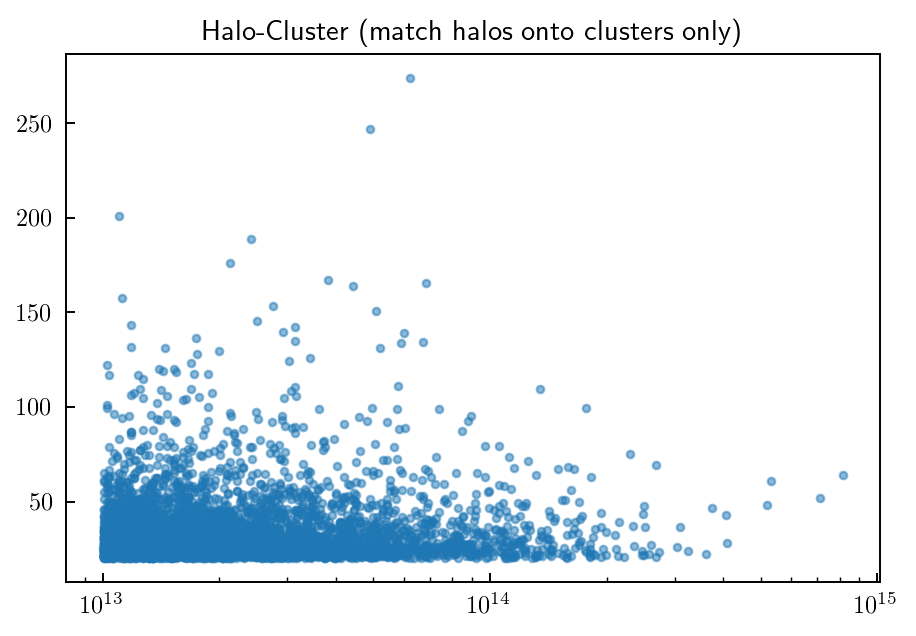

In [13]:
#Sample test of mass richness using matched clusters only
halos_match_ind = np.where(cl_match_ind != -1)
halos_M200b_match = halos_M200b[halos_sort[halos_match_ind]]
#print halos_match_ind
redM_lmda_match = redM_lmda[np.asarray(cl_match_ind[halos_match_ind],dtype=int)]
plt.plot(halos_M200b_match, redM_lmda_match, '.', alpha=0.5)
plt.xscale('log')
plt.title('Halo-Cluster (match halos onto clusters only)')
#plt.ylabel(r'Richness (\lambda)'); plt.xlabel(r'Mass (M_\odot)')
#plt.tight_layout()
#plt.savefig('Halo_Cluster_clmatch_only.png')
plt.show()


In [15]:
#Halo matching algorithm: Go down list of redMapper clusters and find potential halo matches
#Repeat the same process for clusters. 
#Test and debug code. 

redM_sort=np.asarray(sorted(range(len(redM_lmda)),key=lambda x:redM_lmda[x],reverse=True))
print 'Number of redMapper clusters are ', len(redM_sort)
halos_match_ind = np.array([]) #indices of (potentially) matched halos 
halos_uniq_ind = np.array([])
for i in range(redM_data.shape[0]):
    cur_cl_RA = redM_RA[redM_sort[i]]; cur_cl_DEC = redM_DEC[redM_sort[i]]
    cur_cl_comvr = redM_comvr[redM_sort[i]]; cur_cl_z = redM_z[redM_sort[i]]
    
    #Assume clusters that fall into this redshift range have the same redshift as the halo. 
    #Find the distance to the halo according to this assumption, and find ones local to the halo.
    
    #Find clusters within redshift bin of +/- 0.05 
    zbin = 0.05
    zbin_halos_ind = np.asarray(np.where(np.abs(halos_z-cur_cl_z)<zbin))
    
    #Filter clusters in redshift proximity region
    halos_DEC_zfilt = halos_DEC[zbin_halos_ind]; halos_RA_zfilt = halos_RA[zbin_halos_ind]
    
    #Angle difference from RA, DEC using spherical law of cosines
    d_lmda = halos_RA_zfilt - cur_cl_RA
    d_Sigma = np.arccos(np.sin(halos_DEC_zfilt)*np.sin(cur_cl_DEC)+\
                        np.cos(halos_DEC_zfilt)*np.cos(cur_cl_DEC)*np.cos(d_lmda))
    
    #comoving distance between halo and clusters from law of cosines for clusters in same comoving distance
    d_cmvr = np.sqrt(2*cur_cl_comvr**2.*(1.-np.cos(d_Sigma)))
    
    #find local clusters
    max_d_cmvr = 1.0 #set to 1Mpc
    loc_halos_ind = zbin_halos_ind[np.where(d_cmvr<max_d_cmvr)]
    loc_halos_ind = np.setdiff1d(loc_halos_ind, halos_uniq_ind) #remove halos taken by richer clusters
    
    #if local halos present find most massive one
    if np.size(loc_halos_ind) > 0:
        cur_halos_match_ind = loc_halos_ind[np.argmax(halos_M200b[loc_halos_ind])]
        halos_uniq_ind = np.append(halos_uniq_ind, cur_halos_match_ind)
    else:
        cur_halos_match_ind = -1 #-1 for no match
        
    halos_match_ind = np.concatenate((halos_match_ind, [cur_halos_match_ind]))
    
    if i%1e3 == 0:
        print "Matching cluster number ", i
        #print 'Halo_match indices are ', np.where(halos_match_ind > -1)
                              
        #Check for duplicates
        #print 'Unique halo indices are', halos_uniq_ind
        #dupes = [x for n, x in enumerate(cl_uniq_ind) if x in cl_uniq_ind[:n]]
        #print 'Duplicate clusters are ', dupes # [[1], [3]]

print 'Number of halos matched to clusters are ', np.shape(np.where(halos_match_ind>-1))[1]                    

Number of redMapper clusters are  24243
Matching cluster number  0
Matching cluster number  1000
Matching cluster number  2000
Matching cluster number  3000
Matching cluster number  4000
Matching cluster number  5000
Matching cluster number  6000
Matching cluster number  7000
Matching cluster number  8000
Matching cluster number  9000
Matching cluster number  10000
Matching cluster number  11000
Matching cluster number  12000
Matching cluster number  13000
Matching cluster number  14000
Matching cluster number  15000
Matching cluster number  16000
Matching cluster number  17000
Matching cluster number  18000
Matching cluster number  19000
Matching cluster number  20000
Matching cluster number  21000
Matching cluster number  22000
Matching cluster number  23000
Matching cluster number  24000
Number of halos matched to clusters are  4527


(4527,) (4527,)


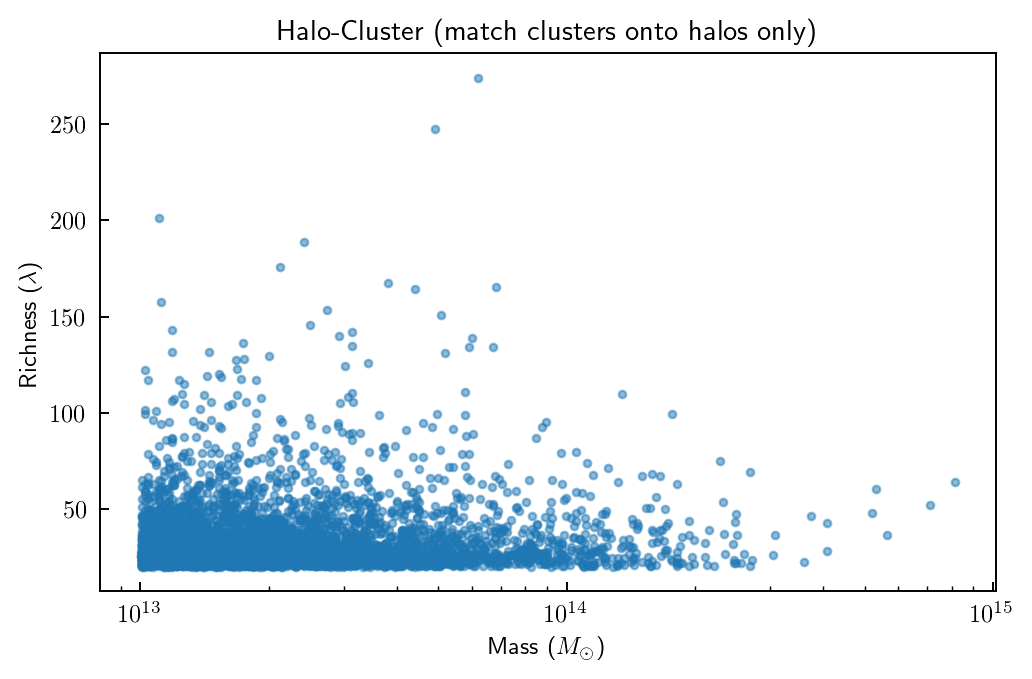

In [17]:
clusters_match_ind = np.where(halos_match_ind != -1)
redM_lmda_match = redM_lmda[redM_sort[clusters_match_ind]]
#print halos_match_ind
halos_M200_match = halos_M200b[np.asarray(halos_match_ind[clusters_match_ind],dtype=int)]

print np.shape(halos_M200_match), np.shape(redM_lmda_match)
plt.plot(halos_M200_match, redM_lmda_match, '.', alpha=0.5)
plt.xscale('log')
plt.title('Halo-Cluster (match clusters onto halos only)')
plt.ylabel(r'Richness ($\lambda$)'); plt.xlabel(r'Mass ($M_\odot$)')
plt.tight_layout()
#plt.savefig('Halo_Cluster_halosmatch_only.png')
plt.show()

### Debugging


In [ ]:
#Check that in cl_match_ind the clusters matched to halos are physically adjacent. Check for redshift.
print "Check for cl_match_ind matching "
cl_match_ind_full = np.where(cl_match_ind != -1)
cl_zfilt = np.asarray(cl_match_ind[cl_match_ind_full], dtype=int)
halos_z_sorted = np.asarray(halos_z[halos_sort])
cl_zdiff =  halos_z_sorted[cl_match_ind_full] - redM_z[cl_zfilt]
#print cl_zdiff[0:50]
cl_z_excess = [x for i, x in enumerate(cl_zdiff) if x>0.05 ]
print 'Redshifts differences outside of specified range: ', len(cl_z_excess), '\n'

#Repeat same code for halos
print "Check for halos_match_ind matching "
halos_match_ind_full = np.where(halos_match_ind != -1)
halos_zfilt = np.asarray(halos_match_ind[halos_match_ind_full], dtype=int)
redM_z_sorted = np.asarray(redM_z[redM_sort])
halos_zdiff =  redM_z_sorted[halos_match_ind_full] - halos_z[halos_zfilt]
#print halos_zdiff[0:50]
halos_z_excess = [x for i, x in enumerate(halos_zdiff) if x>0.05 ]
print 'Redshifts differences outside of specified range: ', len(halos_z_excess), '\n'

#See if the unsorting algorithm works as specified. cl_match_ind and halos_match_ind have indices sorted
#by halo mass and cluster rank. Once again check for redshift. 

#Find unsorted halos to match to clusters
print "Check for redM_match_ind_unsorted matching "
a = np.asarray(cl_match_ind[cl_match_ind_full], dtype=int)
b = np.asarray(halos_sort[cl_match_ind_full], dtype=int)
cl_zdiff2 = halos_z[b] - redM_z[a]
#print cl_zdiff2[0:50]
cl_z_excess2 = [x for i, x in enumerate(cl_zdiff2) if x>0.05 ]
print 'Redshifts differences outside of specified range: ', len(cl_z_excess2), '\n'

#Find unsorted clusters to match to halos
print "Check for halos_match_ind_unsorted matching "
c = np.asarray(halos_match_ind[halos_match_ind_full], dtype=int)
d = np.asarray(redM_sort[halos_match_ind_full], dtype=int)
halos_zdiff2 = redM_z[d] - halos_z[c]
#print halos_zdiff2[0:50]
halos_z_excess2 = [x for i, x in enumerate(halos_zdiff2) if x>0.05 ]
print 'Redshifts differences outside of specified range: ', len(halos_z_excess2), '\n'

print 'Unsort full arrays and then check for match'
cl_match_ind_unsorted = np.array(cl_match_ind, dtype=int)
cl_match_ind_unsorted[halos_sort] = cl_match_ind

uniq_match_ind = np.where(cl_match_ind_unsorted != -1) #these refer to unsorted halos
uniq_match_val = cl_match_ind_unsorted[uniq_match_ind] #matched clusters to the unsorted halos
cl_zdiff3 = halos_z[uniq_match_ind] - redM_z[uniq_match_val]
#print cl_zdiff3[0:50]
cl_z_excess3 = [x for i, x in enumerate(cl_zdiff3) if x>0.05 ]
print 'Redshifts differences outside of specified range: ', len(cl_z_excess3), '\n'

print "Check that uniq_match_ind are indeed same halos, albeit in wrong order"
a = halos_z[uniq_match_ind]
b = halos_z_sorted[cl_match_ind_full]
c = np.setdiff1d(a,b)
print 'Different halos in sorted and unsorted (order does not matter)', len(c)


### Uniqueness matching algorithm
If a cluster matches onto a halo, and that halo matches onto the same cluster. 

In [ ]:
cl_match_ind_unsorted = np.array(cl_match_ind, dtype=int)
cl_match_ind_unsorted[halos_sort] = cl_match_ind
halos_match_ind_unsorted = np.array(halos_match_ind, dtype=int)
halos_match_ind_unsorted[redM_sort] = halos_match_ind

uniq_match_ind = np.where(cl_match_ind_unsorted != -1) #these refer to unsorted halos
uniq_match_val = cl_match_ind_unsorted[uniq_match_ind] #matched clusters to the unsorted halos
nonuniq_match_val = [x for x in range(len(halos_match_ind_unsorted)) if x not in uniq_match_val] #assign all non_uniq halos to -1
uniq_match_bool = halos_match_ind_unsorted[uniq_match_val] == uniq_match_ind
uniq_match_bool = uniq_match_bool[0]
print 'Number of one way clusters matched to halos are ', np.shape(halos_match_ind_unsorted[uniq_match_val])
print 'Number of unique matches are ',np.shape(np.where(uniq_match_bool == True))

a = np.array(halos_match_ind_unsorted[uniq_match_val])
np.place(a , uniq_match_bool==False, -1)
halos_match_ind_unsorted[uniq_match_val] = a
halos_match_ind_unsorted[nonuniq_match_val] = -1
halos_uniq_ind_unsorted = np.copy(halos_match_ind_unsorted)

#Final cuts
redM_cut = np.where(halos_uniq_ind_unsorted != -1)
halos_cut = halos_uniq_ind_unsorted[redM_cut]

print 'After cutting out non-unique matched number of unique matches are', np.shape(np.where(halos_uniq_ind_unsorted != -1))


In [ ]:
redM_lmda_uniq = redM_lmda[redM_cut]
halos_M200b_uniq = halos_M200b[halos_cut]

plt.plot(halos_M200b_uniq, redM_lmda_uniq, '.', alpha=0.5)
plt.xscale('log')
plt.title('Halo-Cluster (Uniquess two way matching)')
plt.ylabel(r'Richness ($\lambda$)'); plt.xlabel(r'Mass ($M_\odot$)')
plt.tight_layout()
#plt.savefig('Halo_Cluster_unique.png')
plt.show()

## Loading onto .dat file

In [79]:
from tools.setup.setup import home_dir
homedir = home_dir()

redM_ID_cut = redM_ID[redM_cut]; redM_RA_cut = redM_RA[redM_cut]; redM_DEC_cut = redM_DEC[redM_cut]; redM_z_cut = redM_z[redM_cut]; redM_lmda_cut = redM_lmda[redM_cut]
halos_ID_cut = halos_ID[halos_cut]; halos_RA_cut = halos_RA[halos_cut]; halos_DEC_cut = halos_DEC[halos_cut]; halos_z_cut = halos_z[halos_cut]; 
halos_M200b_cut = halos_M200b[halos_cut]; halos_Mvir_cut = halos_Mvir[halos_cut]
halos_Rvir_cut = halos_Rvir[halos_cut]; halos_X_cut = halos_X[halos_cut]; halos_Y_cut = halos_Y[halos_cut]; halos_Z_cut = halos_Z[halos_cut]
#RA,DEC are in rad. Convert back to degrees
redM_RA_cut *= 180./np.pi; redM_DEC_cut *= 180./np.pi; halos_RA_cut *= 180./np.pi; halos_DEC_cut *= 180./np.pi

#halos_RVir in Kpc/h. Convert to Mpc/h
halos_Rvir_cut /= 1000

name_str = ('redM_ID', 'redM_RA', 'redM_DEC', 'redM_z', 'redM_lmda', \
            'halos_ID', 'halos_RA', 'halos_DEC', 'halos_z', 'halos_X', 'halos_Y', 'halos_Z', \
            'halos_M200b', 'halos_Mvir', 'halos_Rvir')
outfile = open(homedir+'/output/buzzard/halo_redM_matched.dat','w')
outfile.write('%12s %12s %12s %12s %12s %12s %12s %12s %12s %12s %12s %12s %12s %12s %12s \n'%name_str)
                  
match_num = len(redM_ID_cut)
for i in range(match_num):
    outfile.write('%d %f8 %f8 %f8 %f8 %d %f8 %f8 %f8 %f8 %f8 %f8 %f8 %f8 %f8 \n' \
                  %(redM_ID_cut[i], redM_RA_cut[i], redM_DEC_cut[i], redM_z_cut[i], redM_lmda_cut[i], \
                   halos_ID_cut[i], halos_RA_cut[i], halos_DEC_cut[i], halos_z_cut[i], \
                    halos_X_cut[i], halos_Y_cut[i], halos_Z_cut[i], halos_M200b_cut[i], halos_Mvir_cut[i], halos_Rvir_cut[i]))

outfile.close()

In [95]:
#Check that data is properly stored. 
homedir = home_dir()
redM_dir = homedir + 'output/buzzard/'+'halo_redM_matched.dat'

#Field names of the files from first row of file. Shoule be:
#('redM_ID', 'redM_RA', 'redM_DEC', 'redM_z', 'redM_lmda', 'halos_ID', 'halos_RA', 'halos_DEC', 
#'halos_z', 'halos_X', 'halos_Y', 'halos_Z', 'halos_M200b', 'halos_Mvir', 'halos_Rvir')
redM_halos = np.genfromtxt(redM_dir, dtype ="i, f8, f8, f8, f8, i, f8, f8, f8, f8, f8, f8, f8, f8, f8", \
                  unpack=True, usecols=range(0,15), names=True)

redM_halos = redM_halos.view(np.recarray)
print redM_halos.dtype, np.shape(redM_halos)

(numpy.record, [('redM_ID', '<i4'), ('redM_RA', '<f8'), ('redM_DEC', '<f8'), ('redM_z', '<f8'), ('redM_lmda', '<f8'), ('halos_ID', '<i4'), ('halos_RA', '<f8'), ('halos_DEC', '<f8'), ('halos_z', '<f8'), ('halos_X', '<f8'), ('halos_Y', '<f8'), ('halos_Z', '<f8'), ('halos_M200b', '<f8'), ('halos_Mvir', '<f8'), ('halos_Rvir', '<f8')]) (23998,)
